## Random graph models ##

Suppose that we have calculated descriptive statistics for a network $G$.
For example:
- the mean degree $\langle k\rangle$
- the degree distribution $\Pr(k)$
- the (global) clustering $C$
- the average distance $\langle l \rangle$

How do we interpret the obtained values?
- is the value "big" or "small"?
- is it "typical" or "unusual"?

**Random graph models** are one way to answer these questions:
- a model provides a reference point $x^*$ or a whole reference distribution $\Pr(x)$ for assessing an empirical measurement $x$

### Example ###

Say we analyze a graph $G_*$ and find that its clustering coefficient is $C_*$.
We consider a random graph model $M$ that is parameterized to be *similar* to $G_*$.
For instance, $M$ is defined in such a way that all graph instances obtained from $M$ have
- similar edge density to $G_*$
- similar degree distribution to $G_*$

We can use $M$ to produce many "synthetic" (computer generated) networks $G_1,\ldots, G_n$, and calculate their clustering coefficients $C_1,\ldots,C_N$.
These values represent a reference distribution $\Pr(C)$, which encodes how often $M$ will produce networks
with different values of $C$.

### Example ###

- if the empirical value $C_*$ falls in the "middle" of $\Pr(C)$, the assumptions that underlie $M$ are sufficient to explain the value of $C_*$ in $G_*$ (left-hand panel)
- if $C_*$ is close to one tail of the reference distribution, $C_*$ is somewhat unusual but not unrealistic (middle panel)
- if $C_*$ falls far outside $\Pr(C)$, the assumptions of $M$ are insufficient to explain the value of $C_*$ (right-hand panel)

<img src="images/reference_distribution.png" alt="Comparing an empirical value with a reference distribution" title="Comparing an empirical value with a reference distribution" style="width: 700px;"/>

### Classes of random graph models ###

Random graph models can be broadly divided into two classes:
- Models with **homogeneous** degree. The main example is the **Erdos-Renyi** (ER) random graph. 
- Models with **heterogeneous** degree. This class includes several "famous" models, such as:
    - the **Configuration** model (and the related **Chung-Lu** model)
    - the **Stochastic Block** model (and its **Degree-corrected** extension)
    - the **Barabasi-Albert** (BA) model
    
Some of these models (e.g., the BA model) are *mechanistic* models: they identify and formalize an underlying mechanism in the creation of a network that may explain the existence of an empirically observed pattern. Mechanistic models are commonly found in *hypothesis-driven* network analysis and modeling, where the goal is specifically focused on identifying cause-effect relations.

*Non-mechanistic* random graph models generate structure via a set of free parameters that may or may not have specific meanings.
They are basically *randomized versions* of the observed graph: the model is subject to constraints that reproduce a set of observed features, but it is otherwise maximally random.
In this case, the random graph can be treated as a **null model** (in the classical sense of statistical sciences): the empirical patterns can be analyzed by comparing them with their *expected* value in the model.

### The Erdos-Renyi random graph ###

An ER graph, denoted $G(n, p)$, is a simple graph with $n$ vertices, where $p$ is the probability that each simple edge exists, $(i, j) \in E$:
$$A_{ij}=A_{ji} = \begin{cases} 1 &\text{with probability } p \\ 0 &\text{otherwise}\end{cases} \qquad \text{for all } i<j$$
- edges are independent and identically distributed (iid) random variables
- the size of the network and the edge probability fully specify the model

$G(n, p)$ defines an **ensemble**, i.e., a parametric distribution $\Pr(G \mid p)$ over all simple graphs $G$ having $n$ vertices:
- if $p=1$, the complete graph is drawn with probability $1$
- if $p=0$, the empty graph (all isolated vertices) is drawn with probability $1$
- for $0<p<1$, each graph with exactly $m$ edges is equally likely with probability $p^m(1-p)^{\binom{n}{2}-m}$ (why?)

When we describe the properties of $G(n, p)$, we are typically describing **average** properties, and individual graph instances will tend to fluctuate around these values.

### Properties of ER graphs ###

ER random graphs are *not* realistic models of networks, but they are a useful baseline.
At a high level, ER graphs have the following properties:
- Connectivity is **homogeneous** and entirely driven by $p$ (all nodes are "equal")
- The degree distribution $\Pr(k)$ is a **Poisson** distribution with mean $c = p(n − 1)$ (low-variance)
- The diameter and average distance are $O(\log n)$, making ER graphs **small-world**-like
- The clustering coefficient is $C = O(1/n)$, meaning there are **very few** triangles
- The largest connected component (LCC) is:
    - **large**, i.e., $O(n)$, when $c > 1$
    - **vanishingly small**, when $c < 1$ (this is a *phase transition* at c = 1)

### Generating a $G(n, p)$ network ###

For fixed $n$ and $p$:
1. initialize an empty graph $G$ with $n$ nodes
2. for each of the $\binom{n}{2}$ pairs $i<j$, draw a uniformly random number $r\in(0,1]$
3. if $r \leq p$, then add the undirected edge $(i, j)$ to $G$

This procedure takes $O(n^2)$ time, but can be improved to $O(n^2p)$ with a clever algorithm.

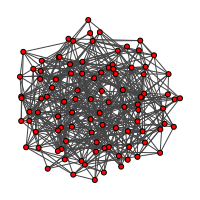

In [1]:
import igraph
n,p = 100,0.1
ER = igraph.Graph.Erdos_Renyi(n,p)
vs_ER = {"bbox":(200,200), "margin":20}
vs_ER['vertex_size'] = 5
igraph.plot(ER, **vs_ER)

### Properties of ER graphs: distribution of the number of edges and expected density ###

In the $G(n, p)$ model, every edge exists independently and with the same probability $p$.

The number of edges follows a **Binomial** distribution of parameters $\binom{n}{2}$ and $p$:
- the probability that $|E|=m$ is $\Pr(m) = \binom{\binom{n}{2}}{m} p^m (1-p)^{\binom{n}{2}-m}$
- the expected number of edges is $\langle m \rangle = \binom{n}{2}p$
- the expected density is $p$

the expected number of edges is 100*99/2*0.1 = 495, the empirical average number of edges is 496.27
the distribution of the number of edges:


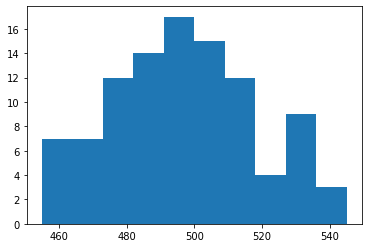

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# generate 100 ER networks and save m
m = [igraph.Graph.Erdos_Renyi(n,p).ecount() for _ in range(100)]
print('the expected number of edges is 100*99/2*0.1 = 495, the empirical average number of edges is', np.mean(m))
print('the distribution of the number of edges:')
plt.hist(m)
plt.show()

### Properties of ER graphs: degree distribution and expected degree ###

Each vertex has $n-1$ possible partners, and each of these exists with probability $p$.

The degree of each vertex follows a **Binomial** distribution of parameters $n-1$ and $p$:
- the probability that $k_i=k$ is $\Pr(k) = \binom{n-1}{k} p^k (1-p)^{n-1-k}$
- the expected degree is $\langle k \rangle = (n-1)p$

Remark: the expressions for $\langle k \rangle$ and $\langle m \rangle$ adhere to the general relation $\langle k \rangle = 2m/n$.

the expected degree is 99*0.1 = 9.9, the empirical average degree is 10.06
the degree distribution is:


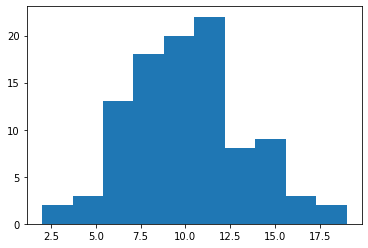

In [3]:
ER = igraph.Graph.Erdos_Renyi(n,p)
degree = ER.degree()
print('the expected degree is 99*0.1 = 9.9, the empirical average degree is', np.mean(degree))
print('the degree distribution is:')
plt.hist(degree)
plt.show()

### Degree distribution of ER graphs ###

> Didn't you say that the degree distribution was a **Poisson**?

Let $p=c/(n-1)$ where $c$ is the "target" mean degree.
When $n$ is large and $p$ is small, a Binomial($n-1,p$) is well approximated by a Poisson($c$):
$$\Pr(k) \approx \frac{c^k}{k!} e^{-c}$$
What is the problem with this distribution?

This distribution has mean and variance $c$, and is slightly asymmetric.
$\Pr(k)$ decays **rapidly** for $k > c$ and is thus highly unrealistic as a model for networks that exhibit heavy-tailed distributions! ER graphs are **poor** models of real-world networks.

the degree distribution with a Poisson fit:


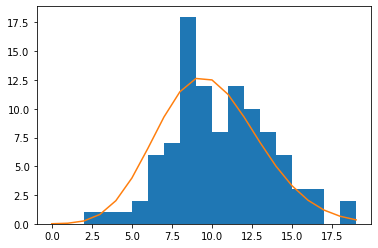

In [4]:
from scipy.stats import poisson
c = (n-1)*p
# poisson distribution data
x = np.arange(0, max(degree)+1, 1)
y = poisson.pmf(x, mu=c)
print('the degree distribution with a Poisson fit:')
plt.hist(degree, bins=x)
plt.plot(x,[n*t for t in y])
plt.show()

### Properties of ER graphs: clustering coefficient ###

The clustering coefficient of the $G(n,p)$ model is:
$$C = \frac{\text{number of triangles}}{\text{number of connected triples}} \propto \frac{\binom{n}{3}p^3}{\binom{n}{3}p^2}=p=\frac{c}{n-1}$$
If $p$ is **small** (i.e., if the network is **sparse**) the density of triangles in the network is close to zero.

The calculation can be generalized to loops of longer length or cliques of larger size: the density of such motifs decays to zero in the large-$n$ limit.
In other words: sparse ER graphs are **locally tree-like**.

<img src="images/tree-like.png" alt="The local tree-like structure of ER graphs" title="The local tree-like structure of ER graphs" style="width: 300px;"/>


### Properties of ER graphs: phase transition in connectedness ###

A **phase transition** is a qualitative sudden change in the fundamental behavior of the model system: a small change in some parameter leads to a big change in the system's behavior.

The $G(n,p)$ model transitions from a completely disconnected graph ($p=0$) to a completely connected graph ($p=1$).

<img src="images/transition.png" alt="The transition of ER graphs when $p$ grows" title="The transition of ER graphs when $p$ grows" style="width: 300px;"/>

### Properties of ER graphs: phase transition in connectedness ###

This transition is **not "slow"**:
- the size $S$ of the *giant* component, expressed as a fraction of the total network size, satisfies is $S=1-e^{-cS}$
- this equation has a trivial solution at $S=0$, and it may or may not have a positive solution based on whether $c>1$ or $c<1$ 

<img src="images/size_giant.png" alt="The size of the giant connected component for different c" title="The size of the giant connected component for different c" style="width: 500px;"/>

### Properties of ER graphs: small-world behavior ###

ER graphs are **small-world** networks, having diameter in $O(\log n)$.
The intuitive reason can be explained with a **branching process**:
- start with an empty graph $G = (V, \emptyset)$
- choose an arbitrary node $i$
- for each of the $n-1$ possible neighbors of $i$, flip a coin with bias $p$ to decide if $(i, j)\in E$
- $i$ will have, on average, $c=(n-1)p$ neighbors
- for each of those neighbors $j$, repeat the process, but for the $n-2$ possible neighbors

### Properties of ER graphs: small-world behavior ###

> How many steps $l$ can this branching process go on for before it stops?

This branching process defines a tree rooted in $i$ where each node has $\approx c$ *children*.
After $l$ steps, the tree will contain $\approx c^l$ nodes, so $l\approx \log n$ is enough to reach all vertices of the network.
In other words, from any $i\in V$, we can reach any other $j\in V$ in approximately $\log n$ steps.

Remark: this argument works for $c>1$! How is this fact related to another property of ER graphs?

### What do ER graphs look like? ###

<img src="images/ER_graphs.png" alt="Examples of ER graphs for different parameters" title="Examples of ER graphs for different parameters" style="width: 500px;"/>

### How random is your graph? ###

The ER model helps us build intuition about what kinds of patterns we should expect to see in our data, if the true
generating process was "truly random" (i.e., a set of iid coin flips).

As an example, let us compare the EN network with an "equivalent" ER graph.

In [5]:
import pandas as pd
df = pd.read_csv('EN/edges.csv', header=0, names=['source','target','weight','color'])
EN = igraph.Graph.TupleList(df[['source','target']].itertuples(index=False), edge_attrs="weight")
n,m = EN.vcount(),EN.ecount()
c = 2*m/n
print('EN has', n, 'vertices and average degree', c)
p = c/(n-1)
print('The equivalent ER graph has n =', n, 'and p =', p)
ER_eq = igraph.Graph.Erdos_Renyi(n,p)

EN has 774 vertices and average degree 4.596899224806202
The equivalent ER graph has n = 774 and p = 0.0059468295275630035


do these two graph look similar?
the EN graph (left) and the equivalent ER graph (right):


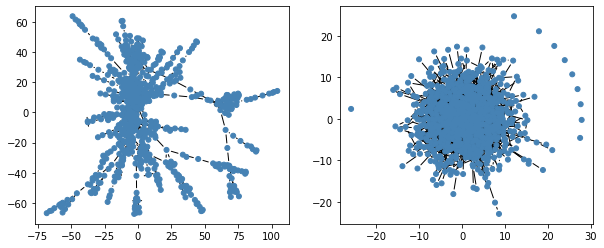

In [6]:
print('do these two graph look similar?')

print('the EN graph (left) and the equivalent ER graph (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
igraph.plot(EN, **vs, target=ax[0])
igraph.plot(ER_eq, **vs, target=ax[1])

the CCDF of EN and the equivalent ER graph in log-log scale:


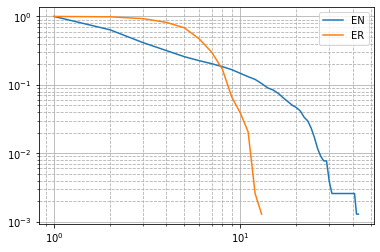

In [7]:
from collections import Counter
EN_deg_count = Counter(EN.degree())
EN_deg_dist_array = np.array([EN_deg_count.get(k,0)/EN.vcount() for k in range(min(EN.degree()),max(EN.degree())+1)])
EN_CCDF = EN_deg_dist_array[::-1].cumsum()[::-1]
degree_range_EN = range(1,len(EN_deg_dist_array)+1)

ER_eq_deg_count = Counter(ER_eq.degree())
ER_eq_deg_dist_array = np.array([ER_eq_deg_count.get(k,0)/ER_eq.vcount() for k in range(min(ER_eq.degree()),max(ER_eq.degree())+1)])
ER_eq_CCDF = ER_eq_deg_dist_array[::-1].cumsum()[::-1]
degree_range_ER_eq = range(1,len(ER_eq_deg_dist_array)+1)

print('the CCDF of EN and the equivalent ER graph in log-log scale:')
plt.loglog(degree_range_EN,EN_CCDF, label='EN')
plt.loglog(degree_range_ER_eq,ER_eq_CCDF, label='ER')
plt.legend()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='--')